In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
from scipy.stats.mstats import winsorize
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats
import os
import json

error_df_path = 'error_df.csv'

if not os.path.exists(error_df_path):
    exit()

C:\Users\satya\AppData\Local\Temp\ipykernel_15156\4229722992.py:5: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


             sum_sq     df          F        PR(>F)
task      36.128794    5.0  18.840855  3.190880e-15
Residual  73.634966  192.0        NaN           NaN
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2     meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------
        b5_euc callibrate_euc   0.4638 0.0316  0.0249  0.9027   True
        b5_euc         s4_euc   0.1904  0.812 -0.2485  0.6293  False
        b5_euc         w1_euc  -0.7807    0.0 -1.2196 -0.3418   True
        b5_euc         w2_euc  -0.4469 0.0432 -0.8858  -0.008   True
        b5_euc         w3_euc  -0.4611 0.0332    -0.9 -0.0222   True
callibrate_euc         s4_euc  -0.2734 0.4727 -0.7122  0.1655  False
callibrate_euc         w1_euc  -1.2445    0.0 -1.6834 -0.8056   True
callibrate_euc         w2_euc  -0.9107    0.0 -1.3496 -0.4718   True
callibrate_euc         w3_euc  -0.9249    0.0 -1.3637  -0.486   True
        s4_euc  

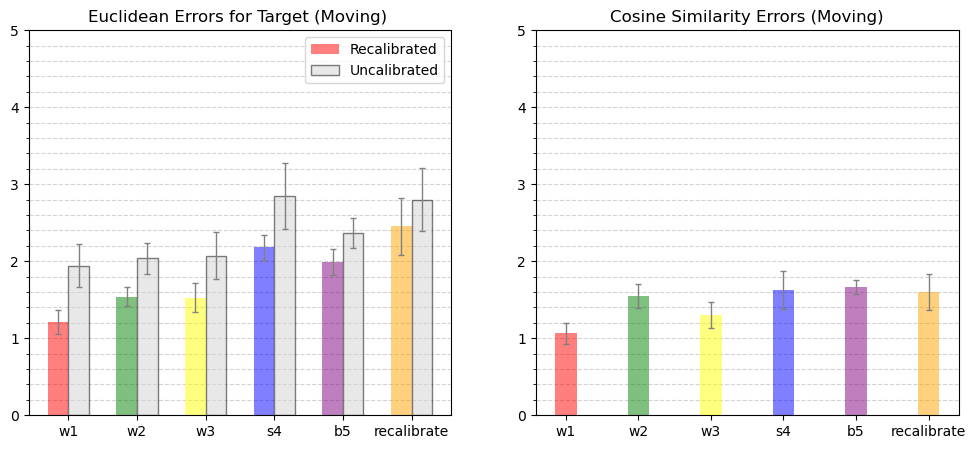

In [2]:
#Plotting means with CI of 95%

df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][0])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][0])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][0])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][0])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][0])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][0])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc', 'callibrate_euc']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
y1_std = df.std()/np.sqrt(df.shape[0])*1.96
y1vals = df.mean()
xvals = range(len(df.columns))
df_combined = pd.melt(df, var_name='task')
model = ols('value ~ task', data = df_combined).fit()
anova_result = sm.stats.anova_lm(model, typ=2)
tukey = pairwise_tukeyhsd(endog=df_combined['value'],
                          groups=df_combined['task'],
                          alpha=0.05)
print(anova_result)
print(tukey)


df = pd.read_csv(error_df_path, index_col=False)
df['w1_euc'] = df['w1_euc'].apply(lambda p: json.loads(p)[0][1])
df['w2_euc'] = df['w2_euc'].apply(lambda p: json.loads(p)[0][1])
df['w3_euc'] = df['w3_euc'].apply(lambda p: json.loads(p)[0][1])
df['s4_euc'] = df['s4_euc'].apply(lambda p: json.loads(p)[0][1])
df['b5_euc'] = df['b5_euc'].apply(lambda p: json.loads(p)[0][1])
df['callibrate_euc'] = df['callibrate_euc'].apply(lambda p: json.loads(p)[0][1])
df = df[['w1_euc', 'w2_euc', 'w3_euc', 's4_euc', 'b5_euc', 'callibrate_euc']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
y2vals = df.mean()
y2_std = df.std()/np.sqrt(df.shape[0])*1.96
# df_combined = pd.melt(df, var_name='task')
# tukey = pairwise_tukeyhsd(endog=df_combined['value'],
#                           groups=df_combined['task'],
#                           alpha=0.05)
# print(tukey)


df = pd.read_csv(error_df_path, index_col=False)
df = df[['w1_vec', 'w2_vec', 'w3_vec', 's4_vec', 'b5_vec', 'callibrate_vec']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
y3_std = df.std()/np.sqrt(df.shape[0])*1.96
y3vals = df.mean()
# df_combined = pd.melt(df, var_name='task')
# tukey = pairwise_tukeyhsd(endog=df_combined['value'],
#                           groups=df_combined['task'],
#                           alpha=0.05)
# print(tukey)

low = min(y1vals)
high = max(y1vals)
labels = [x[:-4] for x in df.columns]
labels = labels[:-1]+['recalibrate']
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
titles = ['Euclidean Errors for Target (Moving) ', 'Cosine Similarity Errors (Moving)']
width = 0.3
x = np.arange(len(y1vals))
plt.figure(figsize=(12,5))

plt.subplot(121)
ax = plt.gca()
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.grid(color='lightgray', which='both', linestyle='dashed') 
ax.set_axisbelow(True)
plt.bar(x-width/2, y1vals, width, yerr=y1_std, label = 'Recalibrated', color = colors, alpha=0.5, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1))
plt.bar(x+width/2, y2vals, width, yerr=y2_std, label = 'Uncalibrated',edgecolor='black', color='lightgray', alpha=0.5, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1))    
plt.xticks(range(len(df.columns)), labels)
plt.title(titles[0])
plt.ylim([0, 5])
plt.legend()
plt.axhline(y=100, zorder=0)

plt.subplot(122)
ax = plt.gca()
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.grid(color='lightgray', which='both', linestyle='dashed') 
ax.set_axisbelow(True)
plt.bar(x, y3vals, width, yerr=y3_std, color = colors, alpha=0.5, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=1))
plt.xticks(range(len(df.columns)), labels)
plt.title(titles[1])
plt.ylim([0, 5])
plt.axhline(y=100, zorder=0)

plt.show()

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
 group1   group2   meandiff p-adj    lower     upper   reject
-------------------------------------------------------------
b5_index s4_index -100.5051    0.0 -122.3524  -78.6577   True
b5_index w1_index -177.7778    0.0 -199.6251 -155.9304   True
b5_index w2_index -161.6162    0.0 -183.4635 -139.7688   True
b5_index w3_index -111.6162    0.0 -133.4635  -89.7688   True
s4_index w1_index  -77.2727    0.0  -99.1201  -55.4254   True
s4_index w2_index  -61.1111    0.0  -82.9585  -39.2638   True
s4_index w3_index  -11.1111 0.6265  -32.9585   10.7362  False
w1_index w2_index   16.1616 0.2514   -5.6857    38.009  False
w1_index w3_index   66.1616    0.0   44.3143    88.009   True
w2_index w3_index      50.0    0.0   28.1527   71.8473   True
-------------------------------------------------------------


w1_index     25.252525
w2_index     41.414141
w3_index     91.414141
s4_index    102.525253
b5_index    203.030303
dtype: float64

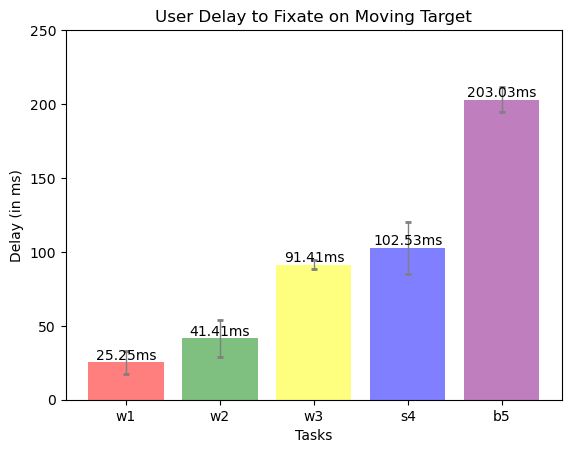

In [3]:
df = pd.read_csv(error_df_path, index_col=False)
df['w1_index'] = df['w1_index'].apply(lambda p: p*1000/60)
df['w2_index'] = df['w2_index'].apply(lambda p: p*1000/60)
df['w3_index'] = df['w3_index'].apply(lambda p: p*1000/60)
df['s4_index'] = df['s4_index'].apply(lambda p: p*1000/60)
df['b5_index'] = df['b5_index'].apply(lambda p: p*1000/60)
df['callibrate_index'] = df['callibrate_index'].apply(lambda p: p*1000/60)
df = df[['w1_index', 'w2_index', 'w3_index', 's4_index', 'b5_index']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)
df_combined = pd.melt(df, var_name='task')

tukey = pairwise_tukeyhsd(endog=df_combined['value'],
                          groups=df_combined['task'],
                          alpha=0.05)
print(tukey)

y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()+np.abs(df.values.min())
colors=["red", "green", 'yellow', "blue", "purple", 'orange']
labels = [x[:-6] for x in df.columns]
# labels = labels[:-1]+['recalibrate']


bar1 = plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color=colors, error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
plt.xticks(range(len(df.columns)), labels)
plt.ylabel('Delay (in ms)')
plt.xlabel('Tasks')
plt.ylim([0, 250])
plt.title('User Delay to Fixate on Moving Target')
for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.2f}' + 'ms', ha='center', va='bottom')
df.mean()

[3.1150028985464496e-38, 9.862020384030297e-45]

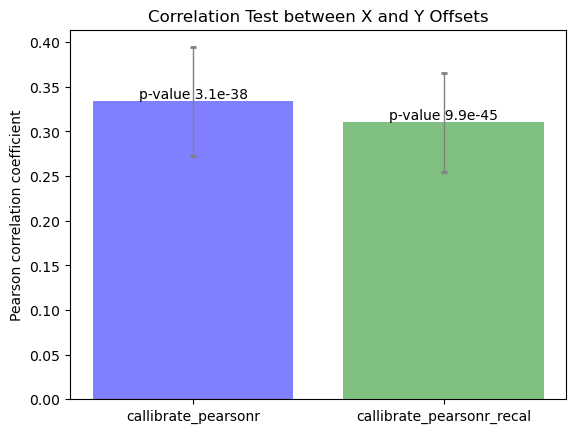

In [4]:
df = pd.read_csv(error_df_path, index_col=False)

cases_with_lower_coeff = 0
cases_with_high_coeff_and_low_p = 0

for index, row in df.iterrows():
    r = [json.loads(row['callibrate_pearsonr']), json.loads(row['callibrate_pearsonr_recal'])]

    if abs(r[0][0]) > abs(r[1][0]):
        cases_with_lower_coeff+=1
    elif r[1][1] < 0.05 and abs(r[1][0]) > 0.5:
        cases_with_high_coeff_and_low_p+=1

cases_with_lower_coeff = cases_with_lower_coeff/ len(df.index)
cases_with_high_coeff_and_low_p = cases_with_high_coeff_and_low_p/ len(df.index)
p = df['callibrate_pearsonr'].apply(lambda p: abs(json.loads(p)[1]))
p_recal = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[1]))

df['callibrate_pearsonr'] = df['callibrate_pearsonr'].apply(lambda p: abs(json.loads(p)[0]))
df['callibrate_pearsonr_recal'] = df['callibrate_pearsonr_recal'].apply(lambda p: abs(json.loads(p)[0]))
df = df[['callibrate_pearsonr', 'callibrate_pearsonr_recal']]
for column in df:
    winsorize(df[column], limits=(0.2,0.2), inplace=True)

y_std = df.std()/np.sqrt(df.shape[0])*1.96
xvals = range(len(df.columns))
yvals = df.mean()

bar1 = plt.bar(xvals, yvals, yerr=y_std, align='center', alpha=0.5, color = ['blue','green'], error_kw=dict(ecolor='gray', lw=1, capsize=2, capthick=2))
plt.xticks(range(len(df.columns)),  df.columns)
plt.ylabel('Pearson correlation coefficient')
plt.title('Correlation Test between X and Y Offsets')

pears = [p.median(),p_recal.median()]

for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, 'p-value '+f'{pears[i]:.1e}', ha='center', va='bottom')


pears

# y = [4, 9, 2]
# z = [1, 2, 3]
# ax = plt.subplot(11)
# ax.bar(x-0.2, y, width=0.2, color='b', align='center')
# ax.bar(x, z, width=0.2, color='g', align='center')
# ax.xaxis_date()
# plt.show()